In [1]:
#

In [3]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [4]:
X_b=np.c_[np.ones((100,1)),X]

In [10]:
#Stochastic Gradient Descent with a simple learning scheduler
n_epochs=50
t0,t1=5,50
m=100
theta=np.random.randn(2,1)
def learning_schedule(t):
  return t0/(t+t1)

In [13]:
for epoch in range(n_epochs):
  for i in range(m):
    random_index=np.random.randint(m)
    print("RANDOM_INDEX:",random_index)
    xi=X_b[random_index:random_index+1]
    print("xi:",xi)
    yi=y[random_index:random_index+1]
    print("yi:",yi)
    gradients=2*xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta=theta-eta*gradients

Streaming output truncated to the last 5000 lines.
xi: [[1.         0.14814467]]
yi: [[1.99610912]]
RANDOM_INDEX: 35
xi: [[1.         1.24769025]]
yi: [[7.32756311]]
RANDOM_INDEX: 58
xi: [[1.         1.77740251]]
yi: [[7.00089031]]
RANDOM_INDEX: 10
xi: [[1.         0.20672062]]
yi: [[5.14450505]]
RANDOM_INDEX: 23
xi: [[1.         0.64717877]]
yi: [[6.80295576]]
RANDOM_INDEX: 46
xi: [[1.         1.52380778]]
yi: [[8.50140047]]
RANDOM_INDEX: 46
xi: [[1.         1.52380778]]
yi: [[8.50140047]]
RANDOM_INDEX: 21
xi: [[1.         0.02917318]]
yi: [[4.58595972]]
RANDOM_INDEX: 1
xi: [[1.         1.52054409]]
yi: [[7.98051049]]
RANDOM_INDEX: 98
xi: [[1.         1.16106155]]
yi: [[7.4510881]]
RANDOM_INDEX: 26
xi: [[1.         0.70047301]]
yi: [[6.36939639]]
RANDOM_INDEX: 86
xi: [[1.         0.20273179]]
yi: [[5.15247224]]
RANDOM_INDEX: 45
xi: [[1.         0.74584216]]
yi: [[7.34691248]]
RANDOM_INDEX: 78
xi: [[1.         1.35934028]]
yi: [[7.03677541]]
RANDOM_INDEX: 48
xi: [[1.         1.81730342

In [14]:
theta

array([[3.90346861],
       [3.05566959]])

In [29]:
##SGD Regressor Class

from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,penalty="l2",eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [30]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.87547607]), array([2.98053644]))

In [44]:
##POLYNOMIAL REGRESSION

m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X +2 + np.random.randn(m,1)

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0],X_poly[0]

(array([1.77844735]), array([1.77844735, 3.16287498]))

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.98533247]), array([[0.9761858 , 0.48677997]]))

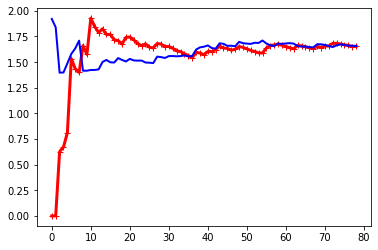

In [51]:
##Learning CURVES
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def plot_learning_curves(model,X,y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_train_predict=model.predict(X_train[:m])
    y_val_predict=model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    val_errors.append(mean_squared_error(y_val,y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+',linewidth=3,label="train")
  plt.plot(np.sqrt(val_errors),"b-",linewidth=2,label="val")


lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [52]:
##tis is a case of underfitting...notice the plateau even after the amount of data @ training increases,the performance doesn't improve
##Both training and validation results are poor

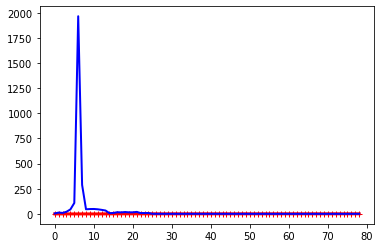

In [53]:
#Let's check one for overfitting

from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
                                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                                ("lin_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)

In [54]:
##OVERFITTING
##you can see that the gap between training and validation lessens with increase of data

In [55]:
##Regularized Models
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.04210044]])

In [56]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.02686899])

In [58]:
sgd_reg_lasso=SGDRegressor(penalty="l1")
sgd_reg_lasso.fit(X,y.ravel())
sgd_reg_lasso.predict([[1.5]])

array([5.03037466])

In [59]:
##LASSO And RIDGE COMBINED-->ELASTIC NET

from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])


array([5.00329582])

In [ ]:
##WE can use softmax regression via logisticRegression
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)